In [1]:
import pandas as pd
import numpy as np

from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode()

#Here we have three files train.csv ,test.csv and gender_submission.csv.
#The training set will be used to build our machine learning models.It Includes Features and 
#info of survived or not.We can also use feature engineering to create new features.

train=pd.read_csv('train.csv')
train.head()

ModuleNotFoundError: No module named 'plotly'

In [504]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

First let us understand the data given us column by column,<br>

* <b>Survived</b>--> If the passenger survived or not 1 or 0.<br>
* <b>pclass--></b>--> A proxy for socio-economic status--> 1 st,2nd or 3 rd<br>
* <b>sex</b>--> sex is male or female<br>
* <b>Age</b>--> age in years<br>
* <b>sibsp</b>--> number of siblings / spouses aboard the titanic<br>
* <b>parch</b>--> number of parents / children aboard the titanic<br>
* <b>ticket</b>-->ticket number<br>
* <b>fare</b>-->passenger fare<br>
* <b>embarked--></b>port of embarkation |  C=Cherbourg ,Q=Queenstown,S=Southampton

**Variable Notes**

**pclass:** A proxy for socio-economic status (SES)<br>
**1st** = Upper<br>
**2nd** = Middle<br>
**3rd** = Lower<br>

**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5<br>

**sibsp:** The dataset defines family relations in this way...<br>
**Sibling** = brother, sister, stepbrother, stepsister<br>
**Spouse** = husband, wife (mistresses and fiancés were ignored)<br>

**parch:** The dataset defines family relations in this way...<br>
**Parent** = mother, father<br>
**Child** = daughter, son, stepdaughter, stepson<br>
Some children travelled only with a nanny, therefore parch=0 for them.<br>


In [505]:
#And finally, the gender_submission file is a sample output.This is what our output should appear.

gender=pd.read_csv('gender_submission.csv')
gender.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

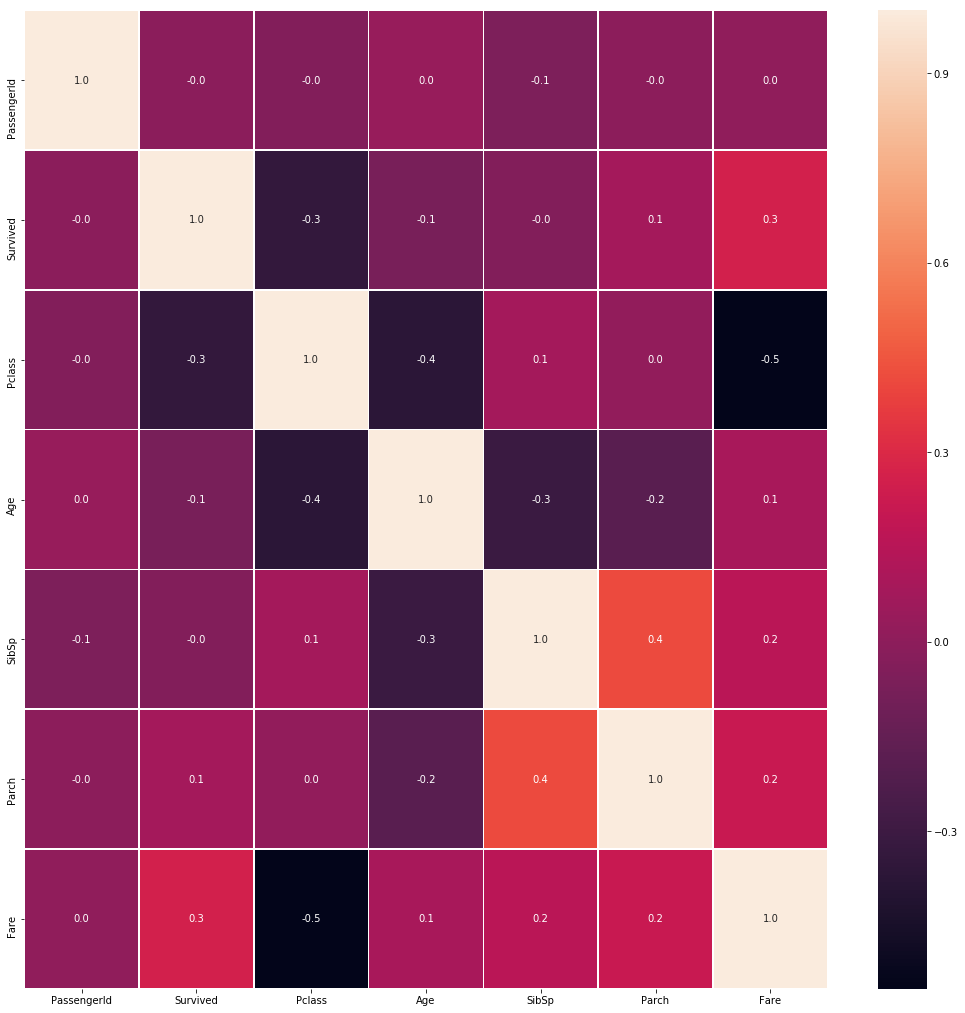

In [506]:
import seaborn as sns
import matplotlib.pyplot as plt

f,ax=plt.subplots( figsize=(18,18))
sns.heatmap(train.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)
plt.show()

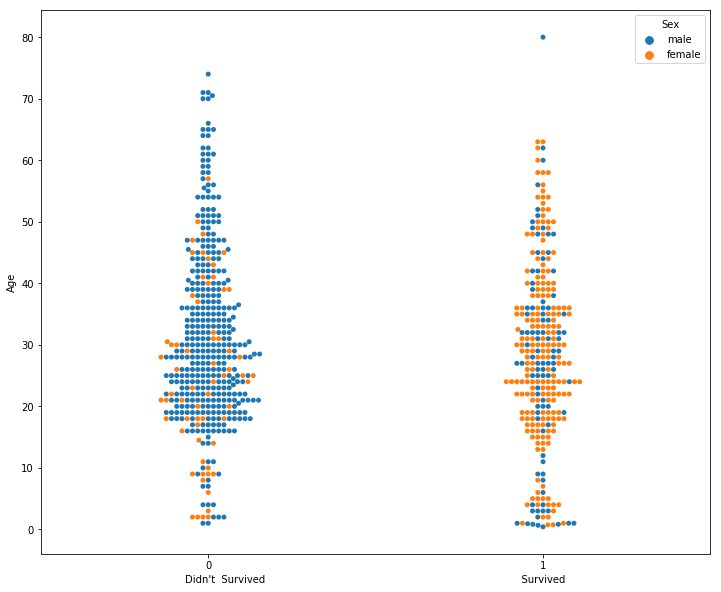

In [507]:
f,ax=plt.subplots( figsize=(12,10))

sns.swarmplot(x="Survived", y="Age",hue="Sex", data=train)
plt.xlabel("Didn't  Survived                                                                                  Survived")
plt.show()

In [508]:
#The test set will be used to see how well our model performs on unseen data.
#The information of survived or not is not included in that file it is our job to find these values.
#For each passenger we'll predict that they were survived or not by using the model that we've trained.


test=pd.read_csv('test.csv')
test.head()
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [509]:
import plotly.graph_objs as go

df=train

embark_C=df[ df['Embarked']=='C' ].Embarked
embark_Q=df[ df['Embarked']=='Q' ].Embarked
embark_S=df[ df['Embarked']=='S' ].Embarked

trace1=go.Histogram(
    
    x=embark_C,
    opacity=0.75,
    name='Cherbourg',
    marker=dict( color='rgba( 171,50,96,0.6 )')

)
trace2=go.Histogram(
    x=embark_Q,
    opacity=0.75,
    name='Queenstown',
    marker=dict( color='rgba(12,50,196,0.6)')
 )
trace3=go.Histogram(
    x=embark_S,
    opacity=0.40,
    name='Southampton',
    marker=dict( color='rgba(13,20,25,0.8)')
    
)


data=[ trace1,trace2,trace3 ]

layout=go.Layout( barmode='overlay', title='Embark Location',
                  xaxis=dict( title='Embark Location'),
                  yaxis=dict( title='Count'),
                )
fig=go.Figure( data=data,layout=layout )
iplot( fig )

In [510]:
def simplify_ages(df):
    df.Age = df.Age.fillna(-0.5)
    bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
    group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df.Age, bins, labels=group_names)
    df.Age = categories
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 1000)
    group_names = ['Unknown', '1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x: x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x: x.split(' ')[1])
    return df    
    
def drop_features(df):
    return df.drop(['Ticket', 'Name', 'Embarked'], axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

train = transform_features(train)
test = transform_features(test)
train.head()

PassengerId  Survived  Pclass     Sex          Age  SibSp  Parch  \
0            1         0       3    male      Student      1      0   
1            2         1       1  female        Adult      1      0   
2            3         1       3  female  Young Adult      0      0   
3            4         1       1  female  Young Adult      1      0   
4            5         0       3    male  Young Adult      0      0   

         Fare Cabin       Lname NamePrefix  
0  1_quartile     N     Braund,        Mr.  
1  4_quartile     C    Cumings,       Mrs.  
2  1_quartile     N  Heikkinen,      Miss.  
3  4_quartile     C   Futrelle,       Mrs.  
4  2_quartile     N      Allen,        Mr.

[196 195 177 162  70  44  25  22]


Text(0.5, 1.0, 'Killed People According to Age Groups')

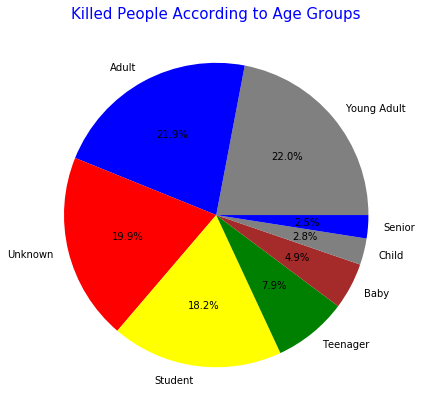

In [511]:

colors = ['grey','blue','red','yellow','green','brown']
explode = [0,0,0,0,0,0,0,0]
#explode : array-like, optional, default: None
#If not None, is a len(x) array which specifies the fraction of the radius with which to offset each wedge.
labels=df.Age.value_counts().index
sizes = df.Age.value_counts().values
#[1201  618  423   39   31   28]

print(sizes)
# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Killed People According to Age Groups',color = 'blue',fontsize = 15)

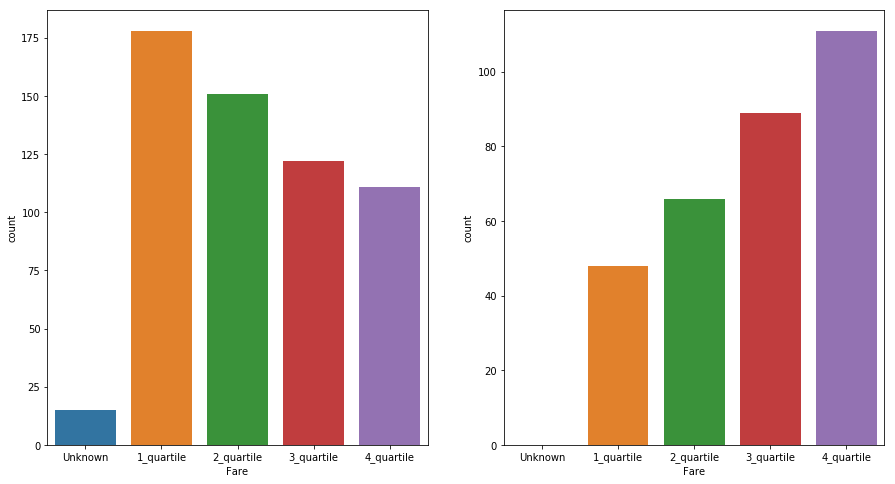

In [512]:
f, axes = plt.subplots(1, 2)
#we'll use subplots to use two graph in one code
f.set_figheight(8)
f.set_figwidth(15)


sns.countplot(df[ df['Sex']=='male'].Fare ,ax=axes[0],label='Male')
sns.countplot(df[ df['Sex']=='female'].Fare ,ax=axes[1],label='Female')
#sns.countplot(kill.manner_of_death)



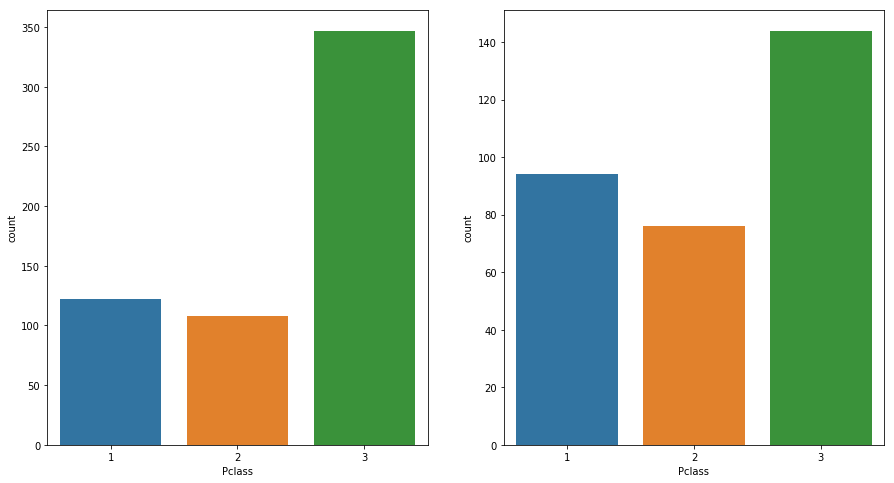

In [513]:
f, axes = plt.subplots(1, 2)
#we'll use subplots to use two graph in one code
f.set_figheight(8)
f.set_figwidth(15)

sns.countplot(df[ df['Sex']=='male'].Pclass ,ax=axes[0],label='Male')
sns.countplot(df[ df['Sex']=='female'].Pclass ,ax=axes[1],label='Female')
#sns.countplot(kill.manner_of_death)


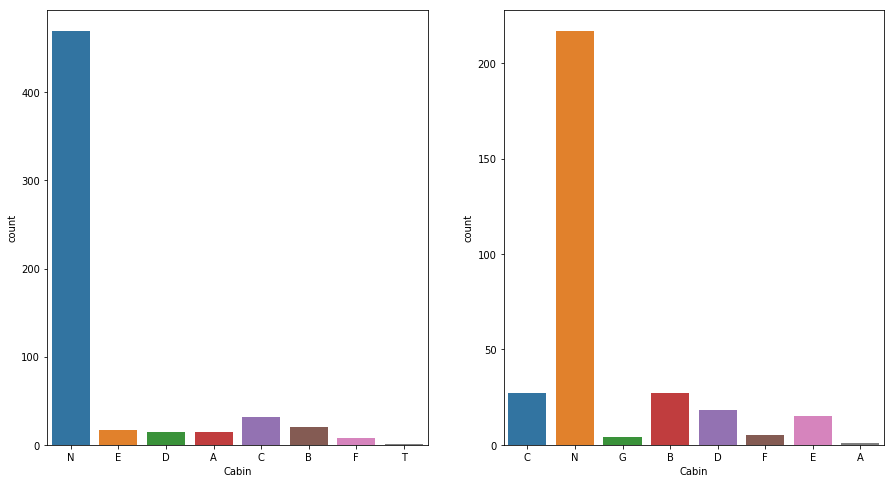

In [514]:
f, axes = plt.subplots(1, 2)
#we'll use subplots to use two graph in one code
f.set_figheight(8)
f.set_figwidth(15)

sns.countplot(df[ df['Sex']=='male'].Cabin ,ax=axes[0],label='Male')
sns.countplot(df[ df['Sex']=='female'].Cabin ,ax=axes[1],label='Female')
#sns.countplot(kill.manner_of_death)


In [515]:
#We've got the full data by appending the test data to train data.ANd the shape of the test file
#is important for submission do not change its shape
df_combined=train.append(test,ignore_index='True',sort=False)
df_combined.head()

PassengerId  Survived  Pclass     Sex          Age  SibSp  Parch  \
0            1       0.0       3    male      Student      1      0   
1            2       1.0       1  female        Adult      1      0   
2            3       1.0       3  female  Young Adult      0      0   
3            4       1.0       1  female  Young Adult      1      0   
4            5       0.0       3    male  Young Adult      0      0   

         Fare Cabin       Lname NamePrefix  
0  1_quartile     N     Braund,        Mr.  
1  4_quartile     C    Cumings,       Mrs.  
2  1_quartile     N  Heikkinen,      Miss.  
3  4_quartile     C   Futrelle,       Mrs.  
4  2_quartile     N      Allen,        Mr.

In [516]:
from sklearn import preprocessing

features=['Fare','Cabin','Age','Sex','Lname','NamePrefix']


for feature in features:
    le=preprocessing.LabelEncoder()
    le=le.fit( df_combined[feature] )
    train[feature]=le.transform( train[feature] )
    test[feature]=le.transform( test[feature] )
    
train.head()

PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Cabin  Lname  \
0            1         0       3    1    4      1      0     0      7    100   
1            2         1       1    0    0      1      0     3      2    182   
2            3         1       3    0    7      0      0     0      7    329   
3            4         1       1    0    7      1      0     3      2    267   
4            5         0       3    1    7      0      0     1      7     15   

   NamePrefix  
0          19  
1          20  
2          16  
3          20  
4          19

In [517]:
#again train and test splitting
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#dependent variable is diagnosis column
y=train.Survived.values

#and the rest of the data is called independents,x s ,features that
#affects the dependent variable y,diagnosis
x=train.drop(['Survived','PassengerId','Lname'],axis=1) #features

#normalization
#we should make normalization because of the anormal differences between 
#our values in the columns of the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

x=(x-np.min(x))/(np.max(x)-np.min(x))

# Create Decision Tree classifer object

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
ids=test['PassengerId']
test=test.drop(['PassengerId','Lname'],axis=1)
test_x=test.values.reshape(-1,1)

predictions= random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
print( acc_random_forest )


92.13


In [526]:

predictions=random_forest.predict(test)
output=pd.DataFrame({'PassengerId':ids,'Survived':predictions})
%cd /home/rabia/titanic/data
output.to_csv( 'titanic_pred2.csv' , index = False )

output.head(20)

/home/rabia/titanic/data


PassengerId  Survived
0           892         0
1           893         0
2           894         0
3           895         0
4           896         1
5           897         0
6           898         1
7           899         0
8           900         1
9           901         0
10          902         0
11          903         0
12          904         1
13          905         0
14          906         1
15          907         1
16          908         0
17          909         0
18          910         0
19          911         0

In [519]:
#find k value
"""
score_list=[]

#let's try different numbers of n_neighbors and see the 
#changing results according to it,here we'll try
#the numbers between 1-15,and append the results 
#to the array,finally we'll plot it to see better

for each in range(1,15):
    knn2=KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train,y_train)
    current_score=knn2.score( x_test,y_test )
    score_list.append( current_score )
plt.plot( range(1,15),score_list )
plt.xlabel("k values")
plt.ylabel("accuracy")

#when  knn has the highest value k takes the value of 8
"""


'\nscore_list=[]\n\n#let\'s try different numbers of n_neighbors and see the \n#changing results according to it,here we\'ll try\n#the numbers between 1-15,and append the results \n#to the array,finally we\'ll plot it to see better\n\nfor each in range(1,15):\n    knn2=KNeighborsClassifier(n_neighbors=each)\n    knn2.fit(x_train,y_train)\n    current_score=knn2.score( x_test,y_test )\n    score_list.append( current_score )\nplt.plot( range(1,15),score_list )\nplt.xlabel("k values")\nplt.ylabel("accuracy")\n\n#when  knn has the highest value k takes the value of 8\n'

In [520]:
"""from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier( n_neighbors=2 ) #n_neighbors=k
knn.fit( x_train,y_train ) #train our model
prediction=knn.predict(x_test) #test our model

print("{} nn score: {}".format(2,knn.score(x_test,y_test))) #accuracy
"""

'from sklearn.neighbors import KNeighborsClassifier\n\nknn=KNeighborsClassifier( n_neighbors=2 ) #n_neighbors=k\nknn.fit( x_train,y_train ) #train our model\nprediction=knn.predict(x_test) #test our model\n\nprint("{} nn score: {}".format(2,knn.score(x_test,y_test))) #accuracy\n'

In [521]:
#ids=test['PassengerId']
#x_train.head()

In [522]:
#test=test.drop(['PassengerId','Lname'],axis=1)
#test.head()

In [523]:
#test_x=test.values.reshape(-1,1)

In [524]:
"""
predictions=knn.predict(test)
output=pd.DataFrame({'PassengerId':ids,'Survived':predictions})



output.to_csv( 'titanic_pred.csv' , index = False )
output.head(10)
""""

SyntaxError: EOL while scanning string literal (<ipython-input-524-450e72b060d2>, line 9)

In [527]:
!pwd

/home/rabia/titanic/data


In [529]:
!head -n10 titanic_pred2.csv

PassengerId,Survived
892,0
893,0
894,0
895,0
896,1
897,0
898,1
899,0
900,1


In [530]:
%cd /home/rabia/titanic/data
!kaggle competitions  submit -c titanic -f titanic_pred2.csv -m "Xgb baseline with numeric cols"
%cd ..

/home/rabia/titanic/data
100%|██████████████████████████████████████| 2.77k/2.77k [00:00<00:00, 16.1kB/s]
Successfully submitted to Titanic: Machine Learning from Disaster/home/rabia/titanic


In [531]:
!kaggle competitions submissions -c titanic -q

fileName           date                 description                     status    publicScore  privateScore  
-----------------  -------------------  ------------------------------  --------  -----------  ------------  
titanic_pred2.csv  2019-08-02 13:32:37  Xgb baseline with numeric cols  complete  0.75598      None          
titanic_pred.csv   2019-08-02 12:39:21  Xgb baseline with numeric cols  complete  0.77511      None          
